<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/EDO_Aplicadas-IMCA/blob/main/RK_3_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodo RK-3 para EDO

Sea el problema de valor inicial(PVI):

$$   y=f(t,y) $$
con
$y(a)=\alpha$  y  $a<t<b$


Donde $f$ una funcion Lipschitziana en la variable $y$. El método consiste en lo siguiente iteracion:

$$w_{i+1}=w_{i}+\frac{h}{4} (K_{1}+3K_{3})$$

Donde:
* $K_{1}=f(t_{i},u_{i})$
* $K_{2}=f(t_{i}+ \frac{h}{3},w_{i}+\frac{h}{3} K_{1})$
* $K_{3}=f(t_{i}+ \frac{2h}{3},w_{i}+\frac{2h}{3} K_{2})$


In [6]:
#RUNGE KUTTA ORDEN 3 - EDO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#definicion de la funcion f
def f(t,y):
  return y-t**2+1
#Metodo de RK
def RK3(a,b,y0,f,N):
  """
  Implementacion metodo de RK3
  a--Inicio Intervalo
  b--Fin de Intervalo
  y0--Aproximacion Inicial
  f-funcion
  N--Pasos
  Salida
  w--aproximacion final
  """
  h=(b-a)/N
  t=a
  w=y0
  Y,T=[],[]
  T+=[a]
  Y+=[w]
  for i in range(1,N+1):
    k1=f(t,w)
    k2=f(t+(h/3),w+(h/3)*k1)
    k3=f(t+2*(h/3),w+2*(h/3)*k2)
    w=w+(h/4)*(k1+3*k3)
    Y+=[w]
    t=a+i*h
    T+=[t]
  return T,Y

In [7]:
# Definicion de la funcion solucion Y
def ff(T):
  y_real=[]
  for t in T:
    y_real+=[(t+1)**2-0.5*np.exp(t)]
  return y_real

      t       w_i       y_i        Er
0   0.0  0.500000  0.500000  0.000000
1   0.2  0.829244  0.829299  0.000065
2   0.4  1.213975  1.214088  0.000093
3   0.6  1.648766  1.648941  0.000106
4   0.8  2.126991  2.127230  0.000112
5   1.0  2.640556  2.640859  0.000115
6   1.2  3.179576  3.179942  0.000115
7   1.4  3.731980  3.732400  0.000112
8   1.6  4.283023  4.283484  0.000108
9   1.8  4.814697  4.815176  0.000100
10  2.0  5.305007  5.305472  0.000088


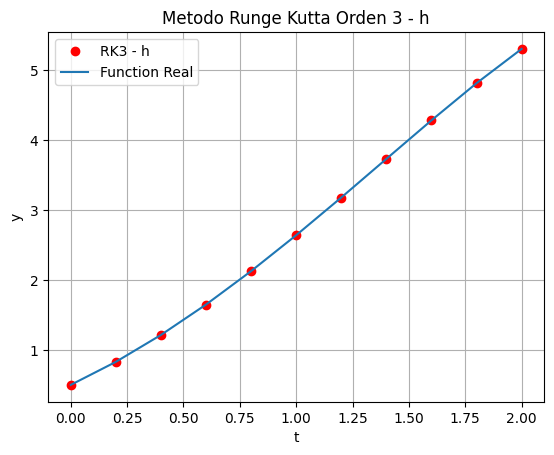

In [9]:
#RK-3 para h=0.5
tr,yr1=RK3(0,2,0.5,f,10)
yv=ff(tr)
datos={'t':tr,'w_i':yr1,'y_i':yv,'Er': [z / q for z,q in zip([x-y for x,y in zip(yv,yr1)],yv)]}
df1=pd.DataFrame(datos)
print(df1)

plt.plot(tr,yr1,'o',color='red')
plt.plot(tr,yv)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Metodo Runge Kutta Orden 3 - h')
plt.legend(['RK3 - h','Function Real'])
plt.show()